In [1]:

import warnings
warnings.filterwarnings("ignore")

import squidpy as sq
import pandas as pd
from anndata import AnnData
import numpy as np
import random



# Building image 6 adata object

In [2]:
keren6 = pd.read_csv("data/keren6Data.csv", index_col=0)

counts = np.zeros(( 5998, 2))
obs = keren6[["cellType"]]
coordinates = keren6[["x", "y"]].to_numpy()


keren6Ann = AnnData(counts,
                    obsm = {"spatial": coordinates})

keren6Ann.obs = keren6

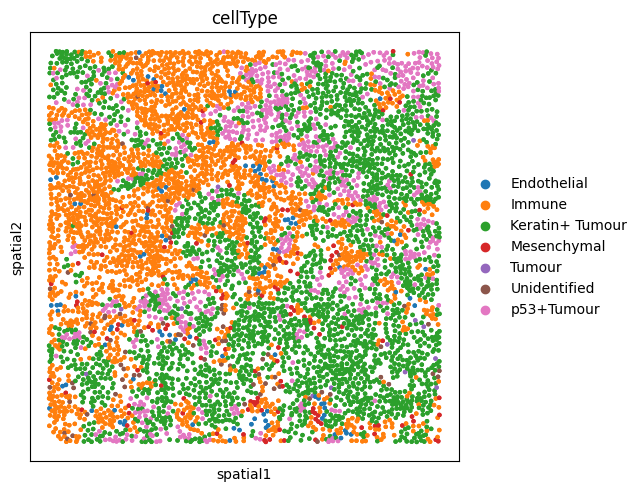

In [3]:
sq.pl.spatial_scatter(keren6Ann, shape=None, color="cellType")

# Analysis

## Observed value

In [4]:
scale = 2048/800

sq.gr.co_occurrence(keren6Ann, cluster_key="cellType", interval = [0, 100*scale])
categories = keren6Ann.obs.cellType.cat.categories.values
p53_idx = np.where(categories == "p53+Tumour")
immune_idx = np.where(categories == "Immune")

observedScore = keren6Ann.uns['cellType_co_occurrence']['occ'][p53_idx][0][immune_idx]
observedScore

  0%|          | 0/1 [00:00<?, ?/s]/opt/anaconda3/envs/squidpy/lib/python3.13/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/opt/anaconda3/envs/squidpy/lib/python3.13/site-packages/spatialdata/_core/query/relational_query.py:504: FutureWarning: functools.partial will be a method descriptor in future Python versions; wrap it in enum.member() if you want to preserve the old behavior
  left = partial(_left_join_spatialelement_table)
/opt/anaconda3/envs/squidpy/lib/python3.13/site-packages/spatialdata/_core/query/relational_query.py:505: FutureWarning: functools.partial will be a method descriptor in future Python versions; wrap it in enum.member() if you want to preserve the old behavior
  left_exclusive = partial(_lef

array([[0.78986347]], dtype=float32)

## Permutation

In [5]:
random.seed(101)
iter = 100

permutedScores = np.zeros(iter)

for i in range(iter):
    data = keren6Ann
    np.random.shuffle(data.obs.cellType.values)

    sq.gr.co_occurrence(data, cluster_key="cellType", interval = [0, 100*scale])
    categories = data.obs.cellType.cat.categories.values
    p53_idx = np.where(categories == "p53+Tumour")
    immune_idx = np.where(categories == "Immune")

    permutedScore = data.uns['cellType_co_occurrence']['occ'][p53_idx][0][immune_idx]
    permutedScores[i] = permutedScore

  0%|          | 0/1 [00:00<?, ?/s]/opt/anaconda3/envs/squidpy/lib/python3.13/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/opt/anaconda3/envs/squidpy/lib/python3.13/site-packages/spatialdata/_core/query/relational_query.py:504: FutureWarning: functools.partial will be a method descriptor in future Python versions; wrap it in enum.member() if you want to preserve the old behavior
  left = partial(_left_join_spatialelement_table)
/opt/anaconda3/envs/squidpy/lib/python3.13/site-packages/spatialdata/_core/query/relational_query.py:505: FutureWarning: functools.partial will be a method descriptor in future Python versions; wrap it in enum.member() if you want to preserve the old behavior
  left_exclusive = partial(_lef

In [6]:
permutedMean = permutedScores.mean()
permutedSd = permutedScores.std()
permutedZscore = (observedScore - permutedMean)/permutedSd


print(observedScore, permutedMean, permutedSd, permutedZscore)

[[0.78986347]] 0.9997892338037491 0.0026687763315637637 [[-78.65993268]]
